# Exercise: Visas over time

#### Summary

Find out how visas issued by the US have changed over time.

#### Data Source(s)

Nonimmigrant Visa Issuances by Visa Class and by Nationality, 1999+, https://travel.state.gov/content/visas/en/law-and-policy/statistics/non-immigrant-visas.html

#### Files

- FYs97-16_NIVDetailTable.xls, "Nonimmigrant Visa Issuances by Visa Class and by Nationality, 1999+"

#### Skills

- Excel files with multiple sheets
- Combining multiple dataframes
- Filling in null values (filling down)
- Dropping and filtering rows
- Renaming columns
- Looping to clean a sheet
- Customizing matplotlib graphs

# Read in FYs97-16_NIVDetailTable.xls, but only the 1999 data

In [11]:
import pandas as pd
df=pd.read_excel("FYs97-16_NIVDetailTable.xls", sheetname='FY99')

## Look at the first couple rows to confirm it's the 1999 data

Don't worry that it's missing a lot of data yet.

In [14]:
df.head()

,Fiscal Year 1999,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0


## Confirm that you have 90 columns and 217 rows

In [15]:
df.shape

(217, 90)

## List all of the columns and their datatype

You'll need to change a pandas display option to make sure you can see all of them. **Make sure there is not a `...` in the middle**.

In [16]:
pd.set_option('display.max_columns',90)
df

,Fiscal Year 1999,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,C-1/D,C-2,C-3,D,D-CREW,E-1,E-2,E-3,E-3D,E-3R,F-1,F-2,F-3,G-1,G-2,G-3,G-4,G-5,H-1A,H-1B,H-1B1,H-1C,H-2A,H-2B,H-2R,H-3,H-4,I,J-1,J-2,K-1,K-2,K-3,K-4,L-1,L-2,M-1,M-2,M-3,NATO-1,NATO-2,NATO-3,NATO-4,NATO-5,NATO-6,NATO-7,N-8,N-9,O-1,O-2,O-3,P-1,P-2,P-3,P-4,Q-1,Q-2,Q-3,R-1,R-2,S-5,S-6,S-7,TN,TD,T-1,T-2,T-3,T-4,T-5,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,3.0,0.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,5.0,0.0,46.0,115.0,0.0,147.0,4.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,28.0,88.0,21.0,20.0,0.0,0.0,0.0,8.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,273.0,14.0,0.0,20.0,59.0,0.0,20.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,4.0,39.0,26.0,1.0,0.0,0.0,0.0,20.0,31.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,0.0,0.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,9.0,0.0,50.0,18.0,0.0,57.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,60.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,22.0,0.0,9.0,18.0,0.0,16.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,119.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,1.0,0.0,4.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,2.0,0.0,20.0,88.0,0.0,74.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,5.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,1.0,0.0,7.0,25.0,0.0,72.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,423.0,24.0,0.0,11.0,138.0,0.0,124.0,8.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,5.0,116.0,29.0,14.0,1.0,0.0,0.0,9.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,5.0,3.0,1.0,0.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,51.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,13.0,24.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,37.0,5.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0
9,Central African Republic,6.0,21.0,0.0,6.0,71.0,31.0,0.0,0.0,5.0,0.0,0.0,

In [17]:
df.dtypes

Fiscal Year 1999     object
A-1                 float64
A-2                 float64
A-3                 float64
B-1                 float64
B-1,2               float64
B-2                 float64
B-1,2/BCC           float64
B-1,2/BCV           float64
C-1                 float64
C-1/D               float64
C-2                 float64
C-3                 float64
D                   float64
D-CREW              float64
E-1                 float64
E-2                 float64
E-3                 float64
E-3D                float64
E-3R                float64
F-1                 float64
F-2                 float64
F-3                 float64
G-1                 float64
G-2                 float64
G-3                 float64
G-4                 float64
G-5                 float64
H-1A                float64
H-1B                float64
                     ...   
O-3                 float64
P-1                 float64
P-2                 float64
P-3                 float64
P-4                 

## Rename the "Fiscal Year 1999" row to be "Country"

In [30]:
df.rename(columns={'Fiscal Year 1999':'Country'}, inplace=True)

## Look at the first 2 rows to make sure you renamed it correctly

In [37]:
df.head(10)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,C-1/D,C-2,C-3,D,D-CREW,E-1,E-2,E-3,E-3D,E-3R,F-1,F-2,F-3,G-1,G-2,G-3,G-4,G-5,H-1A,H-1B,H-1B1,H-1C,H-2A,H-2B,H-2R,H-3,H-4,I,J-1,J-2,K-1,K-2,K-3,K-4,L-1,L-2,M-1,M-2,M-3,NATO-1,NATO-2,NATO-3,NATO-4,NATO-5,NATO-6,NATO-7,N-8,N-9,O-1,O-2,O-3,P-1,P-2,P-3,P-4,Q-1,Q-2,Q-3,R-1,R-2,S-5,S-6,S-7,TN,TD,T-1,T-2,T-3,T-4,T-5,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,3.0,0.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,5.0,0.0,46.0,115.0,0.0,147.0,4.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,28.0,88.0,21.0,20.0,0.0,0.0,0.0,8.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,273.0,14.0,0.0,20.0,59.0,0.0,20.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,4.0,39.0,26.0,1.0,0.0,0.0,0.0,20.0,31.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,0.0,0.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,9.0,0.0,50.0,18.0,0.0,57.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,60.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,22.0,0.0,9.0,18.0,0.0,16.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,119.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,1.0,0.0,4.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,2.0,0.0,20.0,88.0,0.0,74.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,5.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,1.0,0.0,7.0,25.0,0.0,72.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,423.0,24.0,0.0,11.0,138.0,0.0,124.0,8.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,5.0,116.0,29.0,14.0,1.0,0.0,0.0,9.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,5.0,3.0,1.0,0.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,51.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,13.0,24.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,37.0,5.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0
9,Central African Republic,6.0,21.0,0.0,6.0,71.0,31.0,0.0,0.0,5.0,0.0,0.0,0.0,10.0,

# Finding the dirty data

Usually we clean up columns with bad data, but this time **it's the rows that are bad**.

## Look at the first five rows. How can you identify the "bad" row?

There is one near the top and a few near the bottom.

In [ ]:
#The first row is all NaN values, and so are ones near bottom

## Find all of the "bad" rows based on what you decided was unique about the "bad" row

You should get **14 rows and 90 columns**.

In [48]:
import numpy as np

df[df['A-1'].isnull()]

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,C-1/D,C-2,C-3,D,D-CREW,E-1,E-2,E-3,E-3D,E-3R,F-1,F-2,F-3,G-1,G-2,G-3,G-4,G-5,H-1A,H-1B,H-1B1,H-1C,H-2A,H-2B,H-2R,H-3,H-4,I,J-1,J-2,K-1,K-2,K-3,K-4,L-1,L-2,M-1,M-2,M-3,NATO-1,NATO-2,NATO-3,NATO-4,NATO-5,NATO-6,NATO-7,N-8,N-9,O-1,O-2,O-3,P-1,P-2,P-3,P-4,Q-1,Q-2,Q-3,R-1,R-2,S-5,S-6,S-7,TN,TD,T-1,T-2,T-3,T-4,T-5,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,North America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Is there a column for continent? How do you know what continent a country is in?

It's probably easiest to see this in Excel. Don't edit it in Excel, though!

In [54]:
#not a column for continent, there are row names for continent



,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,C-1/D,C-2,C-3,D,D-CREW,E-1,E-2,E-3,E-3D,E-3R,F-1,F-2,F-3,G-1,G-2,G-3,G-4,G-5,H-1A,H-1B,H-1B1,H-1C,H-2A,H-2B,H-2R,H-3,H-4,I,J-1,J-2,K-1,K-2,K-3,K-4,L-1,...,M-1,M-2,M-3,NATO-1,NATO-2,NATO-3,NATO-4,NATO-5,NATO-6,NATO-7,N-8,N-9,O-1,O-2,O-3,P-1,P-2,P-3,P-4,Q-1,Q-2,Q-3,R-1,R-2,S-5,S-6,S-7,TN,TD,T-1,T-2,T-3,T-4,T-5,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,Continent
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,3.0,0.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,5.0,0.0,46.0,115.0,0.0,147.0,4.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,28.0,88.0,21.0,20.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,NaN
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,273.0,14.0,0.0,20.0,59.0,0.0,20.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,4.0,39.0,26.0,1.0,0.0,0.0,0.0,20.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,NaN
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,0.0,0.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,9.0,0.0,50.0,18.0,0.0,57.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,60.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,NaN
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,22.0,0.0,9.0,18.0,0.0,16.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,119.0,6.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,NaN
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,1.0,0.0,4.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,2.0,0.0,20.0,88.0,0.0,74.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,5.0,8.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0,NaN
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,1.0,0.0,7.0,25.0,0.0,72.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0,NaN
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,423.0,24.0,0.0,11.0,138.0,0.0,124.0,8.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,5.0,116.0,29.0,14.0,1.0,0.0,0.0,9.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,5.0,3.0,1.0,0.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0,NaN
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,51.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,13.0,24.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,37.0,5.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0,NaN
9,Central African Republic,6.0,21.0,

## Cleaning up the data

We have several types of rows that we don't like:

- Headers for continents ("Africa," "Europe," etc)
- Totals for continents ("Totals for Africa," "Totals for Europe," etc.)
- The empty lines between continent sections

But we *do*! We're going to do a **three step process**:

1. Create a new "continent" column for each of the header rows
2. Copy that value down into all of the columns below it
3. Delete the header/total/space rows

### STEP 1: For each continent header row, add a new column called `continent` with the value of the continent

> If you get the warning `A value is trying to be set on a copy of a slice from a DataFrame`, let's talk about it, because it means your code didn't work!

In [55]:
continents = ['North America','South America','Oceania','Europe','Africa','Asia']
for continent in continents:
    df.loc[df['Country']==continent, 'Continent'] = continent
df

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,C-1/D,C-2,C-3,D,D-CREW,E-1,E-2,E-3,E-3D,E-3R,F-1,F-2,F-3,G-1,G-2,G-3,G-4,G-5,H-1A,H-1B,H-1B1,H-1C,H-2A,H-2B,H-2R,H-3,H-4,I,J-1,J-2,K-1,K-2,K-3,K-4,L-1,...,M-1,M-2,M-3,NATO-1,NATO-2,NATO-3,NATO-4,NATO-5,NATO-6,NATO-7,N-8,N-9,O-1,O-2,O-3,P-1,P-2,P-3,P-4,Q-1,Q-2,Q-3,R-1,R-2,S-5,S-6,S-7,TN,TD,T-1,T-2,T-3,T-4,T-5,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,Continent
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,3.0,0.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,5.0,0.0,46.0,115.0,0.0,147.0,4.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,28.0,88.0,21.0,20.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,NaN
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,273.0,14.0,0.0,20.0,59.0,0.0,20.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,4.0,39.0,26.0,1.0,0.0,0.0,0.0,20.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,NaN
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,0.0,0.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,9.0,0.0,50.0,18.0,0.0,57.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,60.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,NaN
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,22.0,0.0,9.0,18.0,0.0,16.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,119.0,6.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,NaN
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,1.0,0.0,4.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,2.0,0.0,20.0,88.0,0.0,74.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,5.0,8.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0,NaN
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,1.0,0.0,7.0,25.0,0.0,72.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0,NaN
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,423.0,24.0,0.0,11.0,138.0,0.0,124.0,8.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,5.0,116.0,29.0,14.0,1.0,0.0,0.0,9.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,5.0,3.0,1.0,0.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0,NaN
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,51.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,13.0,24.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,37.0,5.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0,NaN
9,Central African Republic,6.0,21.0,

## STEP 1 CONFIRMATION

Take a look at our data, make sure it looks right!

## STEP 2: Filling down

Use pandas to take that continent value and "copy it down" through the null values. So it might start off looking like this...

|Country|Grand Total|Continent|
|---|---|---|
|Africa|NaN|Africa|
|Algeria|6454.0|NaN|
|Angola|2843.0|NaN|
|Asia|NaN|Asia|
|Afghanistan|2217.0|NaN|
|Bahrain|2502.0|NaN|

and then look like this:

|Country|Grand Total|Continent|
|---|---|---|
|Africa|NaN|Africa|
|Algeria|6454.0|**Africa**|
|Angola|2843.0|**Africa**|
|Asia|NaN|Asia|
|Afghanistan|2217.0|**Asia**|
|Bahrain|2502.0|**Asia**|

In [61]:
df.fillna(method='ffill', inplace=True)
df

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,C-1/D,C-2,C-3,D,D-CREW,E-1,E-2,E-3,E-3D,E-3R,F-1,F-2,F-3,G-1,G-2,G-3,G-4,G-5,H-1A,H-1B,H-1B1,H-1C,H-2A,H-2B,H-2R,H-3,H-4,I,J-1,J-2,K-1,K-2,K-3,K-4,L-1,...,M-1,M-2,M-3,NATO-1,NATO-2,NATO-3,NATO-4,NATO-5,NATO-6,NATO-7,N-8,N-9,O-1,O-2,O-3,P-1,P-2,P-3,P-4,Q-1,Q-2,Q-3,R-1,R-2,S-5,S-6,S-7,TN,TD,T-1,T-2,T-3,T-4,T-5,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,Continent
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,3.0,0.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,5.0,0.0,46.0,115.0,0.0,147.0,4.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,28.0,88.0,21.0,20.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,Africa
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,273.0,14.0,0.0,20.0,59.0,0.0,20.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,4.0,39.0,26.0,1.0,0.0,0.0,0.0,20.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,Africa
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,0.0,0.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,9.0,0.0,50.0,18.0,0.0,57.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,60.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,Africa
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,22.0,0.0,9.0,18.0,0.0,16.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,119.0,6.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,Africa
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,1.0,0.0,4.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,2.0,0.0,20.0,88.0,0.0,74.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,5.0,8.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0,Africa
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,1.0,0.0,7.0,25.0,0.0,72.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0,Africa
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,423.0,24.0,0.0,11.0,138.0,0.0,124.0,8.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,5.0,116.0,29.0,14.0,1.0,0.0,0.0,9.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,5.0,3.0,1.0,0.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0,Africa
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,51.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,13.0,24.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,37.0,5.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0,Africa
9,Central Af

## STEP 2 CONFIRMATION

Check how many rows of each continent exist in the dataset. **Europe and Africa should both have 56.**

In [67]:
df[df['Continent']=='Africa'].shape
df[df['Continent']=='Europe'].shape
df[df['Continent']=='Asia'].shape
df[df['Continent']=='South America'].shape
df[df['Continent']=='North America'].shape
df[df['Continent']=='Oceania'].shape
df[df['Continent']=='Unknown'].shape

(0, 91)

## STEP 3: Deleting the bad rows

### Delete the rows where "Grand Total" is missing

- Tip: There are multiple ways to do this! I can tell you them!

In [74]:
df.drop(['Grand Total']==0, inplace=True)

### Look at the first 55 rows to be sure it worked

In [75]:
df.head(55)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,C-1/D,C-2,C-3,D,D-CREW,E-1,E-2,E-3,E-3D,E-3R,F-1,F-2,F-3,G-1,G-2,G-3,G-4,G-5,H-1A,H-1B,H-1B1,H-1C,H-2A,H-2B,H-2R,H-3,H-4,I,J-1,J-2,K-1,K-2,K-3,K-4,L-1,...,M-1,M-2,M-3,NATO-1,NATO-2,NATO-3,NATO-4,NATO-5,NATO-6,NATO-7,N-8,N-9,O-1,O-2,O-3,P-1,P-2,P-3,P-4,Q-1,Q-2,Q-3,R-1,R-2,S-5,S-6,S-7,TN,TD,T-1,T-2,T-3,T-4,T-5,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,Continent
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,3.0,0.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,5.0,0.0,46.0,115.0,0.0,147.0,4.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,28.0,88.0,21.0,20.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,Africa
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,273.0,14.0,0.0,20.0,59.0,0.0,20.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,4.0,39.0,26.0,1.0,0.0,0.0,0.0,20.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,Africa
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,0.0,0.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,9.0,0.0,50.0,18.0,0.0,57.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,60.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,Africa
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,22.0,0.0,9.0,18.0,0.0,16.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,119.0,6.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,Africa
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,1.0,0.0,4.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,2.0,0.0,20.0,88.0,0.0,74.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,5.0,8.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0,Africa
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,1.0,0.0,7.0,25.0,0.0,72.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0,Africa
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,423.0,24.0,0.0,11.0,138.0,0.0,124.0,8.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,5.0,116.0,29.0,14.0,1.0,0.0,0.0,9.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,5.0,3.0,1.0,0.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0,Africa
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,51.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,13.0,24.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,37.0,5.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0,Africa
9,Central African Republic,6.0,21.0,0.0,6.0,71.0,31.0,0.0,0.0,5.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0,0.0,12.0,23.0,0.0,14.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0

### Delete the rows where "Country" has "Totals"

Now that we have the "Continent" column we can calculate totals with a groupby.

- Tip: There are multiple ways to do this, but only one best way to do it! It probably isn't the same as the last question.

In [81]:
df.drop(['Country']) where'Totals'is True)

SyntaxError: invalid syntax (<ipython-input-81-427bbf1cd540>, line 1)

## Confirm your cleanup worked

Check to make sure you have 195 rows and 90 columns

In [82]:
df.shape

(216, 91)

# Making a few graphs

Create a bar graph of the top 10 countries that visas are from

In [99]:
import matplotlib
%matplotlib inline


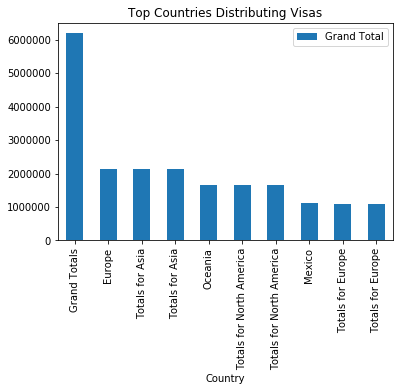

In [105]:
df[['Grand Total','Country']].sort_values(by='Grand Total', ascending=False).head(10).plot(kind='bar',x='Country',title='Top Countries Distributing Visas')

## Clean up that graph!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add commas for the number axis

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
```

## Create a bar graph of the total number of F-1 visas from each continent

And make it look nice!

In [124]:
# df['Country']['F-1']].groupby('Continent').plot(kind='bar',x='Continent',title='Total F-1 Visas Per Continent')

# Read in the data from 2000-2016

They should each be in a separate dataframe.

- Tip: Maybe I have quicker ways to do this?

In [125]:
sheetnames = [
    'FY97', 'FY98', 'FY99', 'FY00', 'FY01', 'FY02', 'FY03', 'FY04', 'FY05', 'FY06',
    'FY07', 'FY08', 'FY09', 'FY10', 'FY11', 'FY12', 'FY13', 'FY14', 'FY15', 'FY16'
]

In [141]:
df2=pd.read_excel("FYs97-16_NIVDetailTable.xls", sheetname=sheetnames)
for foo in df2:
    print(df2[foo])

                             Fiscal Year 1997      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     62.0     23.0     5.0   
2                                      Angola     54.0    169.0     3.0   
3                                       Benin     10.0     43.0     4.0   
4                                    Botswana     10.0     79.0     1.0   
5                                Burkina Faso     19.0      7.0     1.0   
6                                     Burundi      5.0      2.0     0.0   
7                                    Cameroon     44.0     52.0    11.0   
8                                  Cape Verde      3.0     23.0     2.0   
9                    Central African Republic      7.0      5.0     0.0   
10                                       Chad     24.0     53.0     0.0   
11                                    Comoros      0.0      4.0     0.0   
12   Congo, Dem. Rep. of 

                             Fiscal Year 1999      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     32.0     35.0     7.0   
2                                      Angola     53.0     83.0     3.0   
3                                       Benin     50.0    104.0     6.0   
4                                    Botswana      9.0     82.0     0.0   
5                                Burkina Faso     26.0     13.0     1.0   
6                                     Burundi     25.0     20.0     1.0   
7                                    Cameroon     81.0     81.0    12.0   
8                                  Cape Verde     10.0     17.0     3.0   
9                    Central African Republic      6.0     21.0     0.0   
10                                       Chad     17.0     75.0     1.0   
11                                    Comoros      0.0      1.0     0.0   
12   Congo, Dem. Rep. of 

                             Fiscal Year 2002      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     51.0    165.0     2.0   
2                                      Angola     63.0    114.0     7.0   
3                                       Benin      5.0     98.0     6.0   
4                                    Botswana     18.0    174.0     1.0   
5                                Burkina Faso     23.0     13.0     1.0   
6                                     Burundi     31.0     22.0     1.0   
7                                    Cameroon     93.0    192.0    25.0   
8                                  Cape Verde     11.0     34.0     0.0   
9                    Central African Republic     19.0     28.0     0.0   
10                                       Chad     28.0     56.0     0.0   
11                                    Comoros      1.0      5.0     0.0   
12   Congo, Dem. Rep. of 

                             Fiscal Year 2005     A-1      A-2     A-3  \
0                                      Africa     NaN      NaN     NaN   
1                                     Algeria    44.0    163.0     1.0   
2                                      Angola    79.0    100.0     6.0   
3                                       Benin     5.0    100.0     0.0   
4                                    Botswana    23.0     68.0     3.0   
5                                Burkina Faso    34.0     26.0     2.0   
6                                     Burundi    36.0     48.0     1.0   
7                                    Cameroon    32.0    200.0     4.0   
8                                  Cape Verde     6.0     40.0     2.0   
9                    Central African Republic     6.0     47.0     0.0   
10                                       Chad    33.0     79.0     4.0   
11                                    Comoros     3.0     13.0     0.0   
12   Congo, Dem. Rep. of the (Congo Ki

                             Fiscal Year 2008      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     26.0    180.0     2.0   
2                                      Angola     87.0     72.0    10.0   
3                                       Benin      9.0    111.0     2.0   
4                                    Botswana     15.0     59.0     4.0   
5                                Burkina Faso     33.0     63.0     1.0   
6                                     Burundi     12.0     74.0     4.0   
7                                    Cameroon     36.0    193.0     5.0   
8                                  Cape Verde      4.0     36.0     2.0   
9                    Central African Republic     24.0     18.0     1.0   
10                                       Chad     31.0     73.0     2.0   
11                                    Comoros     16.0     31.0     0.0   
12   Congo, Dem. Rep. of 

                             Fiscal Year 2010      A-1      A-2    A-3  \
0                                      Africa      NaN      NaN    NaN   
1                                     Algeria     46.0    182.0    1.0   
2                                      Angola     76.0    110.0    6.0   
3                                       Benin      7.0     90.0    0.0   
4                                    Botswana     15.0    119.0    0.0   
5                                Burkina Faso      1.0     51.0    1.0   
6                                     Burundi     20.0     51.0    0.0   
7                                    Cameroon     29.0    221.0    2.0   
8                                  Cape Verde      6.0     90.0    1.0   
9                    Central African Republic     17.0     36.0    0.0   
10                                       Chad     60.0     40.0    0.0   
11                                    Comoros      6.0      9.0    0.0   
12   Congo, Dem. Rep. of the (Congo Ki

                       Fiscal Year 2012      A-1      A-2     A-3      B-1  \
0                                Africa      NaN      NaN     NaN      NaN   
1                               Algeria     50.0    433.0     0.0    589.0   
2                                Angola     77.0    169.0     1.0     10.0   
3                                 Benin     41.0    109.0     0.0      6.0   
4                              Botswana     16.0     88.0     0.0      0.0   
5                          Burkina Faso     24.0    109.0     3.0      3.0   
6                               Burundi     25.0     59.0     0.0      1.0   
7                              Cameroon     54.0    253.0     5.0      9.0   
8                            Cape Verde      7.0     47.0     1.0      1.0   
9              Central African Republic     40.0     37.0     0.0      0.0   
10                                 Chad     32.0     49.0     1.0      4.0   
11                              Comoros      9.0      2.0     1.

                       Fiscal Year 2014      A-1       A-2     A-3      B-1  \
0                                Africa      NaN       NaN     NaN      NaN   
1                               Algeria     42.0     246.0     0.0     31.0   
2                                Angola     99.0     224.0     5.0     26.0   
3                                 Benin     45.0     134.0     1.0      4.0   
4                              Botswana      6.0      60.0     0.0      5.0   
5                          Burkina Faso     29.0      92.0     3.0      2.0   
6                               Burundi     41.0      65.0     2.0      1.0   
7                            Cabo Verde      9.0      51.0     0.0      1.0   
8                              Cameroon     34.0     460.0     2.0      9.0   
9              Central African Republic     16.0       7.0     0.0      0.0   
10                                 Chad     40.0     125.0     0.0     10.0   
11                              Comoros      5.0    

                       Fiscal Year 2016      A-1       A-2     A-3      B-1  \
0                                Africa      NaN       NaN     NaN      NaN   
1                               Algeria     42.0     359.0     0.0     15.0   
2                                Angola     91.0      98.0     0.0      1.0   
3                                 Benin     40.0     109.0     0.0      8.0   
4                              Botswana      7.0      87.0     0.0      6.0   
5                          Burkina Faso     21.0      91.0     1.0     12.0   
6                               Burundi     19.0      31.0     0.0      1.0   
7                            Cabo Verde     10.0      62.0     1.0      3.0   
8                              Cameroon     72.0     474.0     0.0     14.0   
9              Central African Republic     20.0      20.0     0.0      0.0   
10                                 Chad     34.0     173.0     1.0     85.0   
11                              Comoros      6.0    

# Clean them up, just like you did with the 1999 data

## STEP 1: For each of the dataframes, rename the "Fiscal Year XXXX" column as "Country"

- Tip: What does the code down below give you?

```python
df.columns.str.replace('Fiscal Year.*', 'Country')
```

- Tip: Is there another way to rename columns besides `.rename`?
- Tip: Use a for loop

In [159]:
import re
for year in df2:
    df2[year].columns=df2[year].columns.str.replace('Fiscal Year.*', 'Country')
df2['FY97']

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,C-1/D,C-2,C-3,D,D-CREW,E-1,E-2,E-3,E-3D,E-3R,F-1,F-2,F-3,G-1,G-2,G-3,G-4,G-5,H-1A,H-1B,H-1B1,H-1C,H-2A,H-2B,H-2R,H-3,H-4,I,J-1,J-2,K-1,K-2,K-3,K-4,L-1,L-2,M-1,M-2,M-3,NATO-1,NATO-2,NATO-3,NATO-4,NATO-5,NATO-6,NATO-7,N-8,N-9,O-1,O-2,O-3,P-1,P-2,P-3,P-4,Q-1,Q-2,Q-3,R-1,R-2,S-5,S-6,S-7,TN,TD,T-1,T-2,T-3,T-4,T-5,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,62.0,23.0,5.0,1661.0,507.0,3430.0,0.0,0.0,57.0,8.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,6.0,0.0,39.0,54.0,0.0,126.0,2.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,4.0,32.0,8.0,84.0,24.0,14.0,0.0,0.0,0.0,9.0,29.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6386.0,492.0,6878.0
2,Angola,54.0,169.0,3.0,10.0,1421.0,271.0,1.0,0.0,10.0,12.0,0.0,19.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,222.0,17.0,0.0,41.0,57.0,1.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,4.0,1.0,0.0,0.0,0.0,8.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2397.0,4.0,2401.0
3,Benin,10.0,43.0,4.0,104.0,375.0,249.0,0.0,0.0,37.0,1.0,0.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,2.0,0.0,23.0,37.0,0.0,42.0,14.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,59.0,3.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1105.0,10.0,1115.0
4,Botswana,10.0,79.0,1.0,2.0,366.0,54.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,11.0,0.0,9.0,28.0,0.0,4.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,73.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,850.0,0.0,850.0
5,Burkina Faso,19.0,7.0,1.0,12.0,487.0,309.0,1.0,0.0,24.0,0.0,0.0,9.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,3.0,0.0,7.0,92.0,0.0,60.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1192.0,4.0,1196.0
6,Burundi,5.0,2.0,0.0,57.0,97.0,60.0,3.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,2.0,0.0,19.0,4.0,17.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,387.0,74.0,461.0
7,Cameroon,44.0,52.0,11.0,242.0,768.0,1128.0,0.0,0.0,53.0,0.0,0.0,1.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,202.0,5.0,0.0,28.0,130.0,0.0,105.0,5.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,75.0,12.0,11.0,1.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,17.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2960.0,10.0,2970.0
8,Cape Verde,3.0,23.0,2.0,17.0,3273.0,763.0,0.0,0.0,16.0,54.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,9.0,14.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,8.0,0.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4261.0,1.0,4262.0
9,Central African Republic,7.0,5.0,0.0,7.0,69.0,33.0,0.0,0.0,5.0,0.0,0.0,1.0,23.0,0.0,0.0,

## STEP 2: Add the 'Continent' Column and get rid of the bad rows

The code below will drop any column where 'Country' has 'Totals for' in it. The trick we used above won't work because we're in a list.

```python
df.drop(df.index[df['Country'].str.contains("Totals for", na=False)])
```

In [160]:
# continents = ['North America','South America','Oceania','Europe','Africa','Asia']
# for year in df2:
#     for continent in continents:
#         df2[year].loc[df2[year]['Country']==continent, 'Continent'] = continent

## STEP 3: Add the year to each dataframe

We can't combine them yet because you need to be able to separate them. Use the code below to get close.

```python
for sheet_df, fiscal_year in zip(sheets, sheetnames):
    sheet_df['year'] = fiscal_year
```

In [163]:
# for sheet_df, fiscal_year in zip(df2, sheetnames):
#     sheet_df['year'] = fiscal_year

# Combining the dataframes into one big dataframe

Combine them, confirming the result has 4464 rows and 96 columns

- Tip: don't use .merge!

## A little cleaning

Replace FY97 with 1997, FY98 with 1998, FY99 with FY1999, FY00 with 2000, etc.

- Tip: You could do this in a fancy way using extract or loops or who knows what but honestly .replace might be fastest!

# A little graphing

## Graph the number of visas granted to Colombia over time

Make it look nice!

## How about Iraq?

## Mexico?